# **Práctica 5.2.**  
Objetivo: Realizar una primera predicción dummy basada en una aproximación de naive forecast, donde el valor de la predicción se corresponda al último valor observado.

## Importación de librerías a utilizar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Definición de funciones para la creación manual de una serie temporal sintética.

In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    """Esta función grafica una serie temporal situando:
        - En el eje x el primer argumento (tiempo).
        - En el eje y el segundo argumento (series)."""
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Tiempo")
    plt.ylabel("Valor")
    plt.grid(True)

In [4]:
def trend(time, slope=0):
    """Esta función crea una tendencia a partir de una pendiente,
    cuyo resultado es una línea recta."""
    return slope * time

def seasonal_pattern(season_time):
    """Esta función genera un patrón estacional arbitrario."""
    return np.where(
        season_time < 0.1,
        np.cos(season_time * 7 * np.pi),
        1 / np.exp(5 * season_time)
    )

def seasonality(time, period, amplitude=1, phase=0):
    """Esta función aplica un mismo patrón cada cierto período
    de tiempo (amplitude)."""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    """Esta función genera un ruido aleatorio."""
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

## Creación serie temporal sintética

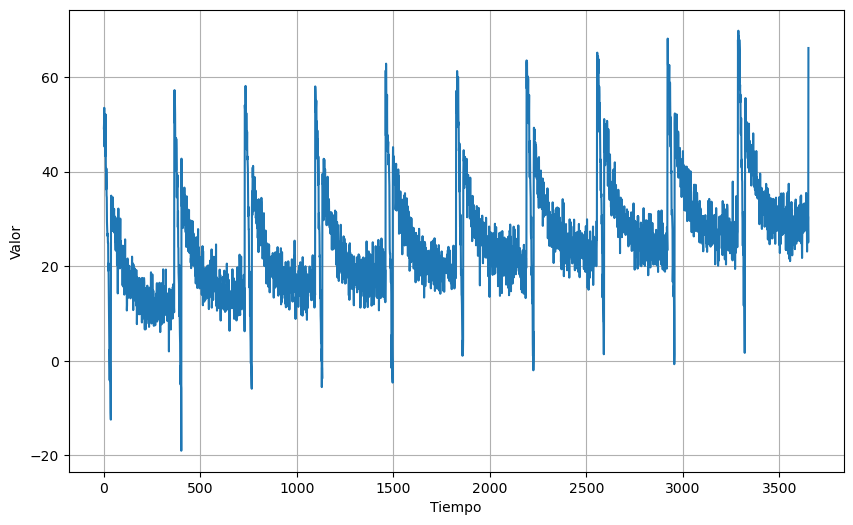

In [5]:
# Definición del lag y la duración de la serie: frecuencia diaria durante 10 años.
time = np.arange(10 * 365 + 1, dtype="float32")

# Variables de la serie:
baseline = 10     # Valor de base.
amplitude = 40    # Amplitud de la estacionalidad, esta se repite cada 40 puntos.
slope = 0.005     # Pendiente de la tendencia.
noise_level = 3   # Nivel de ruido.

# Creación de la serie:
# 1.- Generamos la tendencia.
series = trend(time, slope)
# 2.- Añadimos la estacionalidad.
series += baseline + seasonality(time, period=365, amplitude=amplitude)
# 3.- Añadimos el ruido.
series += noise(time, noise_level, seed=51)

# Representamos gráficamente la serie:
plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

# Split de datos

Segregamos los 9 primeros años de la serie temporal del último.
Este último será precisamente el que trataremos de predecir.

In [10]:
print("Valores de la secuencia temporal (1-10):\n", time[:10])
print("--------------------------------------------")
print("Valores de la serie (1-10):\n", series[:10])

Valores de la secuencia temporal (1-10):
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
--------------------------------------------
Valores de la serie (1-10):
 [49.12849  50.268806 53.472332 45.2807   49.1638   48.079697 46.37603
 43.26431  44.42977  52.07224 ]


In [6]:
# 9 años de "entrenamiento" y 1 para validar
split_time = 3285 #son las iteraciones que cumplen los 9 anios

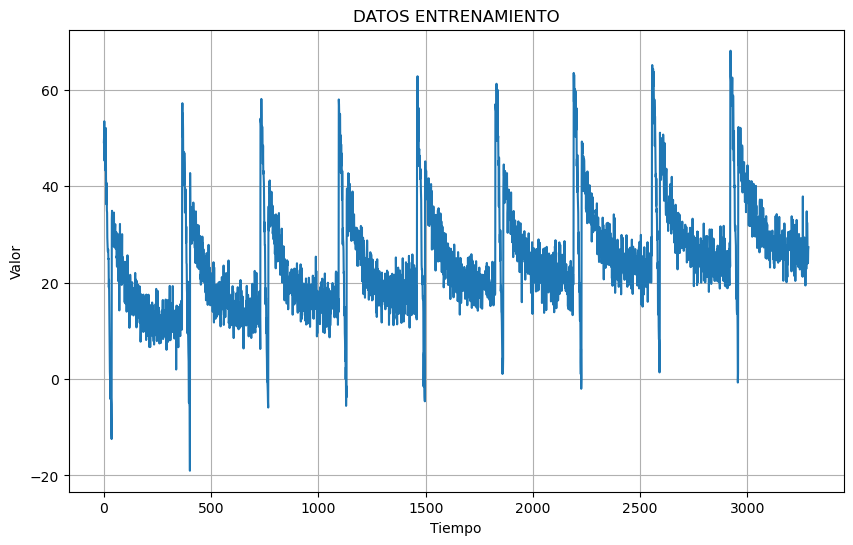

In [12]:
# Datas de "entrenamiento".


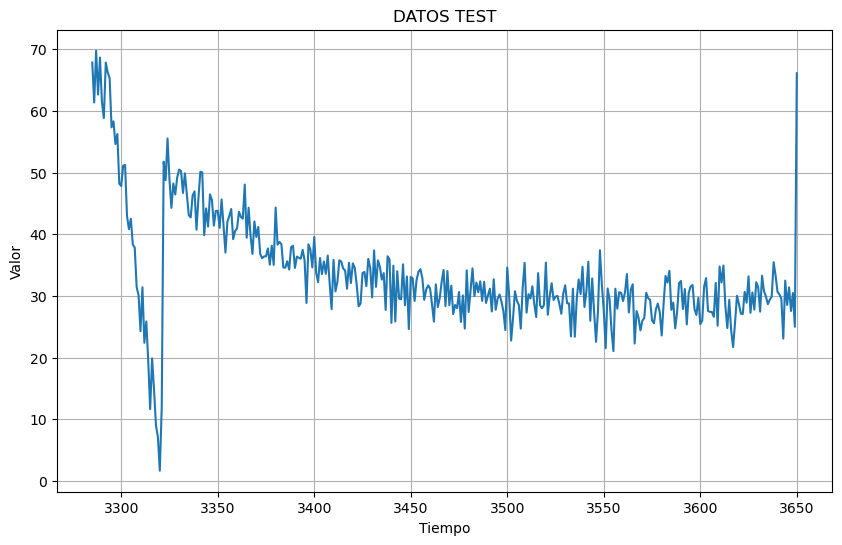

In [13]:
# Datos de testeo.


# Método Naive de Forecast  
Realizar una predicción según el valor del día anterior.

In [14]:
# la predicción será el valor anterior al del "target".


Comparamos gráficamente el valor de las dos series temporales (Real - Forecast) en los datos test.

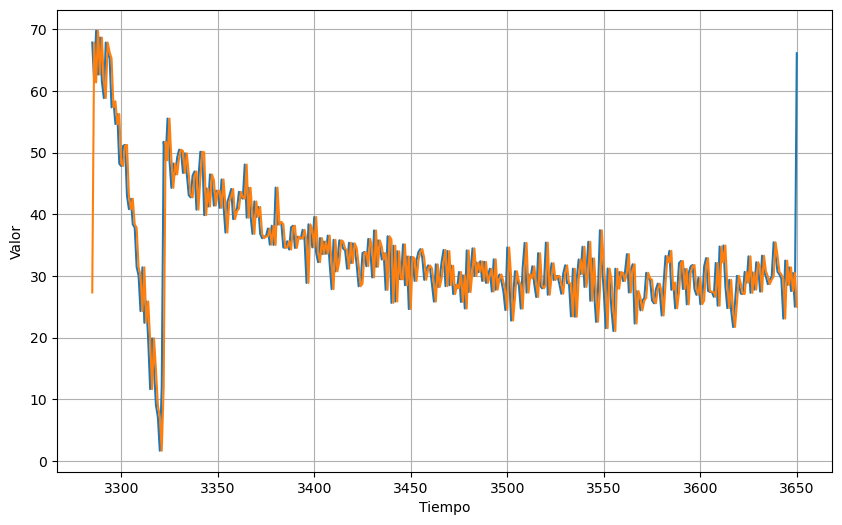

Hacemos zoom sobre los primeros 150 puntos para constatar que, efectivamente, el valor del forecast es siempre el valor real en el lag inmediatamente anterior.

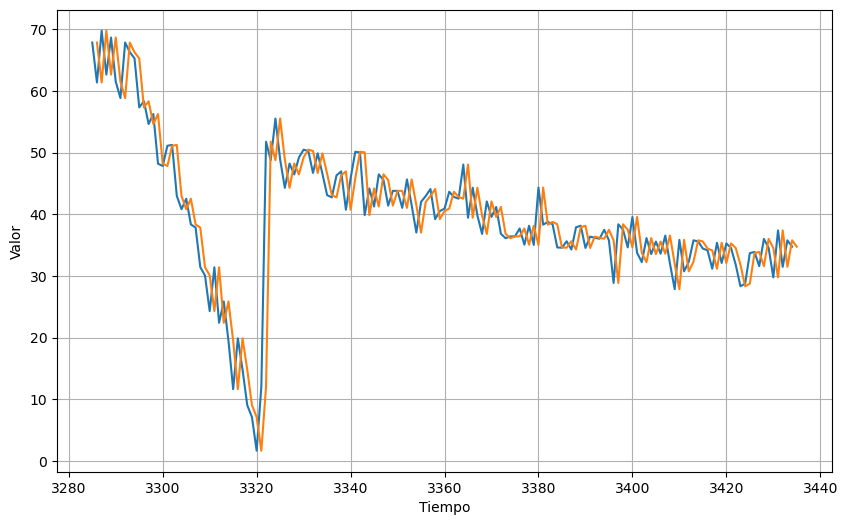

Calculamos la bondad (error) obtenida:

Error mse:  32.807888
Error mae:  3.8983724


# Método Moving Average  
Predecir según una media de una ventana anterior

In [18]:
def moving_average_forecast(series, window_size):
    """Esta función realiza una predicción numérica basada en 
    la media de los n valores anteriores (window_size)
    Ejemplo: para un window_size=1, el resultado obtenido sería
    el mismo que en el ejemplo anterior de naive forecast."""

### Moving average - Primer enfoque 

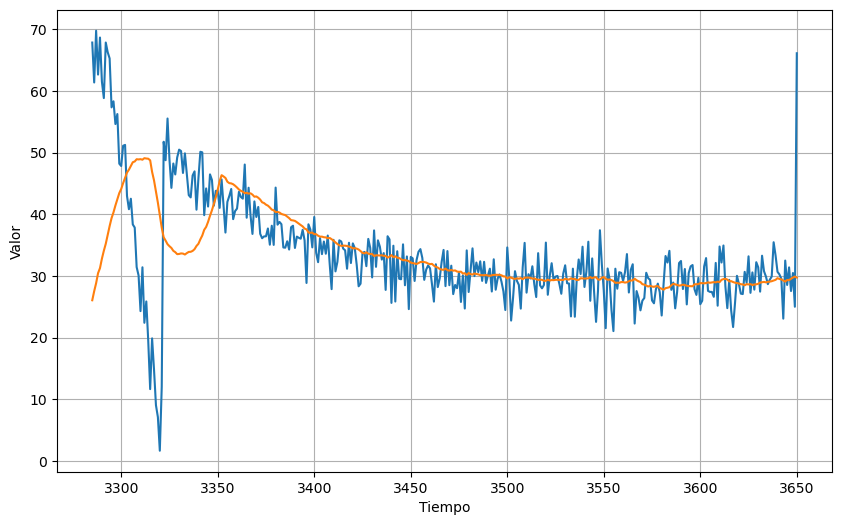

In [19]:
WINDOW_SIZE = 30

In [21]:
# Cálculo del error de la predicción.


¿El resultado es mejor o peor que el obtenido mediante el primer método naive?

### Moving average - Segundo enfoque
Viendo que el moving average de 30 días no recoge en demasia ni la tendencia ni estacionalidad, podríamos añadir a la predicción realizada lo siguiente:
Un moving average de la diferencia del valor de cada cada día con su homólogo en la anterior estación.

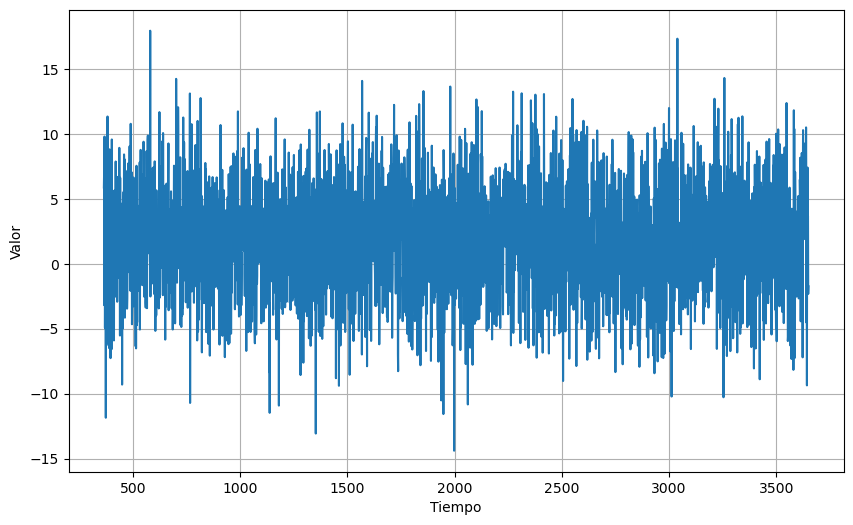

In [22]:
# A partir del primer año del segundo año, calculamos la diferencia de cada día con su homólogo previo.


Mantenemos el tamaño de la venta y pasamos a calcular el moving average de las diferencias entre valores de una estación y sus homólogs de la anterior.

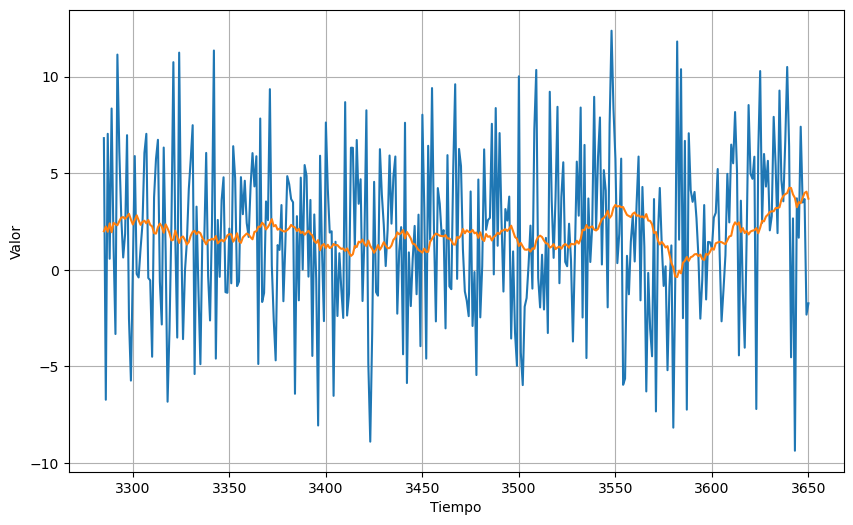

In [23]:
WINDOW_SIZE = 30


Ahora ya se podría añadir los valores de este moving average de las diferencias al forecast realizado con el primer enfoque.

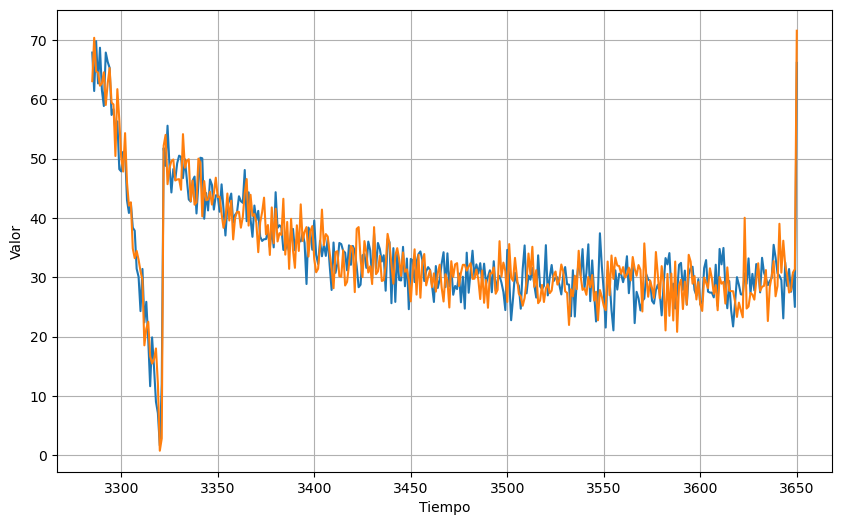

In [ ]:
# Cálculo del error.
